# Modul Import

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 8.3MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#unsupervised learning library
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/df_clean_10.csv?token=ATIFOY4SJN45RJNQPKROGPDA6POQU')
df

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,AYB,EYB,PRICE,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,WARD,SALEYEAR,RMDL
0,3,1,Hot Water Rad,1,4,1906.0,1972,1050000.0,2401.0,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2,1,24,1627,Ward 2,2011.0,1
1,3,1,Warm Cool,1,3,1917.0,1967,1325000.0,2692.0,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,2,1,24,1815,Ward 2,2011.0,1
2,3,1,Warm Cool,1,3,1908.0,1967,1240000.0,1662.0,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,1,0,11,1424,Ward 2,2010.0,1
3,2,1,Forced Air,1,3,1880.0,1984,1065000.0,1600.0,2 Story,Semi-Detached,Above Average,Very Good,Common Brick,Built Up,Hardwood,1,1,13,2090,Ward 2,2012.0,1
4,2,1,Hot Water Rad,1,3,1880.0,1967,1100000.0,1958.0,2 Story,Single,Above Average,Good,Common Brick,Built Up,Hardwood,1,2,12,2090,Ward 2,2012.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,1,0,Hot Water Rad,1,2,1936.0,1957,180000.0,1193.0,1.5 Story Fin,Single,Above Average,Average,Common Brick,Comp Shingle,Hardwood,1,1,12,4798,Ward 8,2012.0,0
23370,2,0,Forced Air,1,5,1939.0,1964,336000.0,1458.0,1.5 Story Fin,Single,Average,Good,Common Brick,Comp Shingle,Hardwood,1,2,12,4480,Ward 8,2016.0,1
23371,2,1,Hot Water Rad,1,3,1911.0,1964,227000.0,912.0,2 Story,Row Inside,Average,Good,Common Brick,Built Up,Hardwood,1,0,11,1733,Ward 8,2014.0,1
23372,1,1,Warm Cool,1,3,1976.0,1988,230000.0,2264.0,3 Story,Row Inside,Average,Good,Common Brick,Built Up,Wood Floor,1,0,11,2359,Ward 8,2013.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23374 entries, 0 to 23373
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      23374 non-null  int64  
 1   HF_BATHRM   23374 non-null  int64  
 2   HEAT        23374 non-null  object 
 3   AC          23374 non-null  int64  
 4   BEDRM       23374 non-null  int64  
 5   AYB         23374 non-null  float64
 6   EYB         23374 non-null  int64  
 7   PRICE       23374 non-null  float64
 8   GBA         23374 non-null  float64
 9   STYLE       23374 non-null  object 
 10  STRUCT      23374 non-null  object 
 11  GRADE       23374 non-null  object 
 12  CNDTN       23374 non-null  object 
 13  EXTWALL     23374 non-null  object 
 14  ROOF        23374 non-null  object 
 15  INTWALL     23374 non-null  object 
 16  KITCHENS    23374 non-null  int64  
 17  FIREPLACES  23374 non-null  int64  
 18  USECODE     23374 non-null  int64  
 19  LANDAREA    23374 non-nul

In [ ]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'BEDRM', 'AYB', 'EYB', 'PRICE',
       'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF',
       'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'WARD',
       'SALEYEAR', 'RMDL'],
      dtype='object')

# Preproc

In [ ]:
def boxplot_sorted(df,by,column,rot=90):
  df2 = pd.DataFrame({col:vals[column] for col,vals in df.groupby(by)})
  meds = df2.median().sort_values()
  return df2[meds.index].boxplot(rot=rot,return_type='axes')

In [111]:
def median_sorted(df,by,column,rot=90):
  df2 = pd.DataFrame({col:vals[column] for col,vals in df.groupby(by)})
  meds = df2.median().sort_values()
  diff = meds.diff()
  data = pd.DataFrame(meds)
  data.columns = ['Median']
  data['Diff'] = diff
  return data

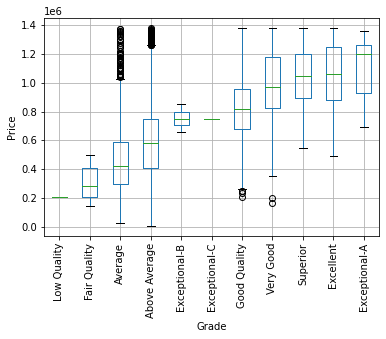

In [ ]:
axes = boxplot_sorted(df,by = 'GRADE',column='PRICE' )
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [113]:
median_sorted(df,by = 'GRADE',column='PRICE' )

,Median,Diff
Low Quality,210000.0,NaN
Fair Quality,283000.0,73000.0
Average,420000.0,137000.0
Above Average,579000.0,159000.0
Exceptional-B,750000.0,171000.0
Exceptional-C,750000.0,0.0
Good Quality,819000.0,69000.0
Very Good,972450.0,153450.0
Superior,1050000.0,77550.0
Excellent,1060000.0,10000.0


In [112]:
median_sorted(df,by = 'CNDTN',column='PRICE' )

,Median,Diff
Poor,390000.0,NaN
Fair,485000.0,95000.0
Average,500000.0,15000.0
Very Good,626712.5,126712.5
Good,666075.0,39362.5
Excellent,759900.0,93825.0


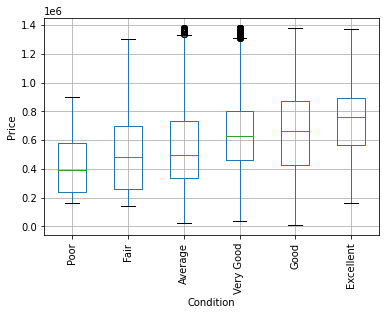

In [ ]:
axes = boxplot_sorted(df,by = 'CNDTN',column='PRICE' )
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

In [ ]:
df['GRADE'].value_counts()

Average          8029
Above Average    7620
Good Quality     5189
Very Good        1774
Excellent         415
Superior          291
Exceptional-A      28
Fair Quality       23
Exceptional-B       3
Low Quality         1
Exceptional-C       1
Name: GRADE, dtype: int64

In [ ]:
df['CNDTN'].value_counts()

Good         12798
Average       5910
Very Good     4174
Excellent      392
Fair            81
Poor            19
Name: CNDTN, dtype: int64

# Feature Engineering

In [ ]:
df_ord_grade = df['GRADE']
grade_mapping = [{'col':'GRADE','mapping':{None:0,'Low Quality':1,
                                             'Fair Quality':2,
                                             'Average':3,
                                             'Above Average':4,
                                             'Exceptional-B':5,
                                             'Exceptional-C':6,
                                             'Good Quality':7,
                                             'Very Good':8,
                                             'Superior':9,
                                             'Excellent':10,
                                             'Exceptional-A':11,}}]
ordinal_encoder = ce.OrdinalEncoder(cols='GRADE',mapping=grade_mapping)
df_grade_trans = ordinal_encoder.fit_transform(df_ord_grade)
df_grade_trans

,GRADE
0,8
1,4
2,4
3,4
4,4
...,...
23369,4
23370,3
23371,3
23372,3


In [ ]:
df_ord_cond = df['CNDTN']
cond_mapping = [{'col':'CNDTN','mapping':{None:0,'Poor':1,
                                             'Fair':2,
                                             'Average':3,
                                             'Good':4,
                                             'Very Good':5,
                                             'Excellent':6}}]
ordinal_encoder = ce.OrdinalEncoder(cols='CNDTN',mapping=cond_mapping)
df_cond_trans = ordinal_encoder.fit_transform(df_ord_cond)
df_cond_trans

,CNDTN
0,3
1,5
2,5
3,5
4,4
...,...
23369,3
23370,4
23371,4
23372,4


In [ ]:
df_ohe = df[['HEAT','STYLE','STRUCT','EXTWALL','ROOF','INTWALL','WARD']]
enc = OneHotEncoder(handle_unknown='ignore')
df_ohe_trans = pd.DataFrame(enc.fit_transform(df_ohe).toarray())
df_ohe_trans.columns = enc.get_feature_names()
df_ohe_trans

,x0_Air Exchng,x0_Air-Oil,x0_Elec Base Brd,x0_Electric Rad,x0_Evp Cool,x0_Forced Air,x0_Gravity Furnac,x0_Hot Water Rad,x0_Ht Pump,x0_Ind Unit,x0_No Data,x0_Wall Furnace,x0_Warm Cool,x0_Water Base Brd,x1_1 Story,x1_1.5 Story Fin,x1_1.5 Story Unfin,x1_2 Story,x1_2.5 Story Fin,x1_2.5 Story Unfin,x1_3 Story,x1_3.5 Story Fin,x1_3.5 Story Unfin,x1_4 Story,x1_4.5 Story Unfin,x1_Bi-Level,x1_Default,x1_Split Foyer,x1_Split Level,x1_Vacant,x2_Default,x2_Multi,x2_Row End,x2_Row Inside,x2_Semi-Detached,x2_Single,x2_Town End,x2_Town Inside,x3_Aluminum,x3_Brick Veneer,...,x3_Stone/Stucco,x3_Stucco,x3_Stucco Block,x3_Vinyl Siding,x3_Wood Siding,x4_Built Up,x4_Clay Tile,x4_Comp Shingle,x4_Composition Ro,x4_Concrete,x4_Metal- Cpr,x4_Metal- Pre,x4_Metal- Sms,x4_Neopren,x4_Shake,x4_Shingle,x4_Slate,x4_Typical,x4_Water Proof,x4_Wood- FS,x5_Carpet,x5_Ceramic Tile,x5_Default,x5_Hardwood,x5_Hardwood/Carp,x5_Lt Concrete,x5_Parquet,x5_Resiliant,x5_Terrazo,x5_Vinyl Comp,x5_Vinyl Sheet,x5_Wood Floor,x6_Ward 1,x6_Ward 2,x6_Ward 3,x6_Ward 4,x6_Ward 5,x6_Ward 6,x6_Ward 7,x6_Ward 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'BEDRM', 'AYB', 'EYB', 'PRICE',
       'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF',
       'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'WARD',
       'SALEYEAR', 'RMDL'],
      dtype='object')

In [ ]:
df_cat = df[['GRADE','CNDTN','HEAT','STYLE','STRUCT','EXTWALL','ROOF','INTWALL','WARD']]
df_int = df.drop(df_cat,axis=1)
df_final = pd.concat([df_int,df_trans,df_cond_trans,df_grade_trans],axis=1)
df_final

,BATHRM,HF_BATHRM,AC,BEDRM,AYB,EYB,PRICE,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,SALEYEAR,RMDL,x0_Air Exchng,x0_Air-Oil,x0_Elec Base Brd,x0_Electric Rad,x0_Evp Cool,x0_Forced Air,x0_Gravity Furnac,x0_Hot Water Rad,x0_Ht Pump,x0_Ind Unit,x0_No Data,x0_Wall Furnace,x0_Warm Cool,x0_Water Base Brd,x1_1 Story,x1_1.5 Story Fin,x1_1.5 Story Unfin,x1_2 Story,x1_2.5 Story Fin,x1_2.5 Story Unfin,x1_3 Story,x1_3.5 Story Fin,x1_3.5 Story Unfin,x1_4 Story,x1_4.5 Story Unfin,x1_Bi-Level,...,x3_Stucco Block,x3_Vinyl Siding,x3_Wood Siding,x4_Built Up,x4_Clay Tile,x4_Comp Shingle,x4_Composition Ro,x4_Concrete,x4_Metal- Cpr,x4_Metal- Pre,x4_Metal- Sms,x4_Neopren,x4_Shake,x4_Shingle,x4_Slate,x4_Typical,x4_Water Proof,x4_Wood- FS,x5_Carpet,x5_Ceramic Tile,x5_Default,x5_Hardwood,x5_Hardwood/Carp,x5_Lt Concrete,x5_Parquet,x5_Resiliant,x5_Terrazo,x5_Vinyl Comp,x5_Vinyl Sheet,x5_Wood Floor,x6_Ward 1,x6_Ward 2,x6_Ward 3,x6_Ward 4,x6_Ward 5,x6_Ward 6,x6_Ward 7,x6_Ward 8,CNDTN,GRADE
0,3,1,1,4,1906.0,1972,1050000.0,2401.0,2,1,24,1627,2011.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,8
1,3,1,1,3,1917.0,1967,1325000.0,2692.0,2,1,24,1815,2011.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4
2,3,1,1,3,1908.0,1967,1240000.0,1662.0,1,0,11,1424,2010.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4
3,2,1,1,3,1880.0,1984,1065000.0,1600.0,1,1,13,2090,2012.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4
4,2,1,1,3,1880.0,1967,1100000.0,1958.0,1,2,12,2090,2012.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23369,1,0,1,2,1936.0,1957,180000.0,1193.0,1,1,12,4798,2012.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4
23370,2,0,1,5,1939.0,1964,336000.0,1458.0,1,2,12,4480,2016.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
23371,2,1,1,3,1911.0,1964,227000.0,912.0,1,0,11,1733,2014.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
23372,1,1,1,3,1976.0,1988,230000.0,2264.0,1,0,11,2359,2013.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Modelling

In [ ]:
X = df_final.drop('PRICE',axis=1)
y = df_final['PRICE']

In [ ]:
X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size=0.8,random_state=2020)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#linreg
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)

print('LinReg MAE Score:',mean_absolute_error(y_test,y_pred))
print('LinReg MSE Score:',mean_squared_error(y_test,y_pred))

LinReg MAE Score: 8.397905925475453e+16
LinReg MSE Score: 9.121691329015366e+35


In [ ]:
#Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

print('Lasso (Ordinal) MAE Score:',mean_absolute_error(y_test,y_pred))
print('Lasso MSE Score:',mean_squared_error(y_test,y_pred))

Lasso (Ordinal) MAE Score: 88586.22784540223
Lasso MSE Score: 14260887438.015217


In [ ]:
#Ridge
rid = Ridge()
rid.fit(X_train_scaled,y_train)
y_pred = rid.predict(X_test_scaled)

print('Ridge (Ordinal) MAE Score:',mean_absolute_error(y_test,y_pred))
print('Ridge MSE Score:',mean_squared_error(y_test,y_pred))

Ridge (Ordinal) MAE Score: 88526.46957364047
Ridge MSE Score: 14238876071.874865


In [ ]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)

print('RandomForest (Ordinal) Score:',mean_absolute_error(y_test,y_pred))
print('RandomForest  Score:',mean_squared_error(y_test,y_pred))

RandomForest (Ordinal) Score: 120453.82647058823
RandomForest  Score: 28198174615.14583


#Cormat

In [ ]:
# 10 Fitur paling Berkorelasi
corrmat = df.corr()
cols = corrmat.nlargest(11,'PRICE')['PRICE'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features from df 10']
most_corr

,Most Correlated Features
0,PRICE
1,FIREPLACES
2,GBA
3,BATHRM
4,BEDRM
5,HF_BATHRM
6,AC
7,RMDL
8,LANDAREA
9,SALEYEAR
